In [1]:
# # pip install wandb
# ! pip install lightgbm  

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import wandb
from sklearn.ensemble import RandomForestClassifier

In [2]:
readIn = pd.read_csv("data/train_df.csv")
train_df = pd.DataFrame(readIn)

In [3]:
train_df

,BORROWER_ID,target,CONTRACT_ID_SUM,CONTRACT_CREDIT_LOSS_SUM,CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN,CONTRACT_INCOME_SUM,CONTRACT_INSTALMENT_AMOUNT_MEAN,CONTRACT_INTEREST_RATE_MEAN,CONTRACT_LGD_SUM,CONTRACT_LOAN_AMOUNT_SUM,...,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0
0,d8SqtuEV,0,2,0.0,17.27,129364.0,12012.0,21.50,359391.0,396086,...,0,2,0,0,0,0,0,0,0,0
1,lrdxML0g,0,1,0.0,0.00,0.0,9528.0,16.57,994868.0,55590,...,0,1,0,0,0,0,0,0,0,0
2,gII7nnq4,0,1,16350.0,7.05,127305.0,8899.0,22.35,282553.0,275924,...,0,0,0,0,1,0,0,0,0,0
3,MMkJ8z/e,0,1,0.0,0.00,0.0,14329.0,0.00,68981.0,138862,...,0,1,0,0,0,0,0,0,0,0
4,M417onFP,0,1,2395.0,0.00,0.0,4003.0,23.92,163319.0,169624,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437017,pNIqzUE4,0,1,0.0,0.00,0.0,0.0,0.00,0.0,299931,...,0,1,0,0,0,0,0,0,0,0
437018,clBMCzqR,0,1,0.0,0.00,0.0,0.0,0.00,0.0,13293921,...,0,1,0,0,0,0,0,0,0,0
437019,WkX2GJQS,0,1,0.0,0.00,0.0,0.0,0.00,0.0,272812,...,0,1,0,0,0,0,0,0,0,0
437020,+5cUBKRc,0,1,0.0,0.00,0.0,0.0,0.00,0.0,272812,...,0,1,0,0,0,0,0,0,0,0


In [4]:
readIn = pd.read_csv("data/res_df.csv")
df = pd.DataFrame(readIn)

In [5]:
df

,BORROWER_ID,target,CONTRACT_ID_SUM,CONTRACT_CREDIT_LOSS_SUM,CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN,CONTRACT_INCOME_SUM,CONTRACT_INSTALMENT_AMOUNT_MEAN,CONTRACT_INTEREST_RATE_MEAN,CONTRACT_LGD_SUM,CONTRACT_LOAN_AMOUNT_SUM,...,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0
0,d8SqtuEV,0,3,13831.0,27.76,256244.0,27149.0,17.31,3295461.0,3367556,...,0,2,0,1,0,0,0,0,0,0
1,lrdxML0g,0,1,0.0,0.00,0.0,9528.0,16.57,994868.0,55590,...,0,1,0,0,0,0,0,0,0,0
2,gII7nnq4,0,1,16350.0,7.05,127305.0,8899.0,22.35,282553.0,275924,...,0,0,0,0,1,0,0,0,0,0
3,MMkJ8z/e,0,1,0.0,0.00,0.0,14329.0,0.00,68981.0,138862,...,0,1,0,0,0,0,0,0,0,0
4,M417onFP,0,1,2395.0,0.00,0.0,4003.0,23.92,163319.0,169624,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149846,POeQToeq,0,1,0.0,0.00,0.0,0.0,0.00,0.0,211813,...,0,1,0,0,0,0,0,0,0,0
1149847,C0amt32x,0,1,0.0,0.00,0.0,0.0,0.00,0.0,485818,...,0,1,0,0,0,0,0,0,0,0
1149848,WW5vgE+y,0,1,0.0,0.00,0.0,0.0,0.00,0.0,5866242,...,0,1,0,0,0,0,0,0,0,0
1149849,26ZlUKOa,0,1,0.0,0.00,0.0,0.0,0.00,0.0,80914,...,0,1,0,0,0,0,0,0,0,0


In [6]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Bemenő változók és célváltozó meghatározása
bemenő_változók = train_df.columns.drop(['BORROWER_ID', 'target'])  # Az összes oszlop, kivéve a 'BORROWER_ID' és 'target'

bemenő_változók=['CONTRACT_CREDIT_LOSS_SUM',
                 'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN',
                 'CONTRACT_INCOME_SUM','CONTRACT_INSTALMENT_AMOUNT_MEAN',
                 'CONTRACT_INTEREST_RATE_MEAN',
                 'CONTRACT_LGD_SUM',
                 'CONTRACT_LOAN_AMOUNT_SUM',
                 'CONTRACT_MORTGAGE_LENDING_VALUE_SUM',
                 'BORROWER_TYPE_OF_SETTLEMENT_3.0',
                 'CONTRACT_BANK_ID_1d42bbf5',
                 'CONTRACT_BANK_ID_2c6f5579',
                 'CONTRACT_BANK_ID_3b3b8a5e',
                 'CONTRACT_BANK_ID_41562c5f',
                 'CONTRACT_BANK_ID_c8072c06',
                 'CONTRACT_BANK_ID_caa130b5',
                 'CONTRACT_BANK_ID_dfce4aec',
                 'CONTRACT_CREDIT_INTERMEDIARY_1.0',
                 'CONTRACT_CREDIT_INTERMEDIARY_20001.0',
                 'CONTRACT_CURRENCY_14',
                 'CONTRACT_FREQUENCY_TYPE_3265c5b7',
                 'CONTRACT_FREQUENCY_TYPE_ad534644',
                 'CONTRACT_LOAN_CONTRACT_TYPE_1',
                 'CONTRACT_LOAN_CONTRACT_TYPE_2',
                 'CONTRACT_LOAN_CONTRACT_TYPE_11',
                 'CONTRACT_LOAN_TYPE_5a06241e',
                 'CONTRACT_LOAN_TYPE_83910425',
                 'CONTRACT_LOAN_TYPE_b503a0de',
                 'CONTRACT_LOAN_TYPE_d3aaffde',
                 'CONTRACT_LOAN_TYPE_eab72d7a',
                 'CONTRACT_REFINANCED_2.0',
                 'CONTRACT_REFINANCED_10001.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0',
                 'BORROWER_COUNTY_6.0',
                 'BORROWER_COUNTY_84.0',
                 'BORROWER_COUNTY_114.0',
                 'BORROWER_COUNTY_163.0',
                 'BORROWER_COUNTY_181.0' ]

X = train_df[bemenő_változók]  # Bemenő változók
y = train_df['target']  # Célváltozó

In [174]:
model = RandomForestClassifier(random_state=22, n_estimators= 110, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='log2',n_jobs=4)

In [42]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': randint(3, 15),
#     # 'subsample': [0.8, 0.9, 1.0],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

In [43]:
# rs = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='neg_log_loss', cv=5, random_state=22)


In [44]:
# model.fit(X,y)

In [45]:
# rs.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    max_features='log2',
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=110, n_jobs=4,
                                                    random_state=22),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028DCC720790>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028CED14E0D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028DCC699690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028CED146310>},
                   random_state=22, scoring='neg_log_loss')

In [46]:
# print("Legjobb paraméterek:")
# print(rs.best_params_)
# print("Legjobb negatív log_loss érték:", rs.best_score_)

Legjobb paraméterek:
{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 79}
Legjobb negatív log_loss érték: -0.017549601085538373


In [138]:
# model = RandomForestClassifier(random_state=22, n_estimators= 79, max_depth=14, min_samples_split=4, min_samples_leaf=1, max_features='log2',n_jobs=4)

In [176]:
model.fit(X,y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=110, n_jobs=4,
                       random_state=22)

# SAVING RESULTS

In [177]:
merged_df = df[df['BORROWER_ID'].isin(df_target['BORROWER_ID'])]

In [178]:
X = merged_df[bemenő_változók]

In [179]:
merged_df['predicted_target'] = model.predict_proba(X)[:,1]

C:\Users\User\AppData\Local\Temp\ipykernel_11060\1279984231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_target'] = model.predict_proba(X)[:,1]


In [180]:
cols=['BORROWER_ID', 'predicted_target']

res=merged_df[cols]

In [181]:
res.columns=['BORROWER_ID', 'PRED']

In [182]:
#best so far: 0.01065148585696977
# ebben nem vagyok biztos: 0.011489444435447733

res['PRED'].mean()

0.0093738295147039

In [193]:
res['PRED']*=0.0148/res['PRED'].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_11060\3950806251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['PRED']*=0.0148/res['PRED'].mean()


In [194]:
res['PRED']=res['PRED'].apply(lambda x: 1 if x>1 else x)

C:\Users\User\AppData\Local\Temp\ipykernel_11060\3980668293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['PRED']=res['PRED'].apply(lambda x: 1 if x>1 else x)


In [195]:
res['PRED'].mean()

0.014799746116087838

In [107]:
print(res.shape)
res.to_csv('data/results-atlag-1-ala-szoritva-3szor.csv', index=False)

(1117674, 2)


In [108]:
readIn = pd.read_csv("data/res-best.csv")
res2 = pd.DataFrame(readIn)

In [184]:
merge=pd.merge(res,res2, on='BORROWER_ID')

In [185]:
merge.sample(20)

,BORROWER_ID,PRED_x,PRED_y
726133,OYjgwOFn,0.001556,0.001556
662902,nYSnH4DV,0.001804,0.001804
867824,UdgoAzBB,0.001321,0.001321
189520,9d8VA8v+,0.003626,0.003626
985027,Bwtz6e0o,0.001233,0.001233
1010102,KXZPn/Bo,0.001910,0.001910
373154,NsSatBM0,0.000544,0.000544
381357,CjqGqPE6,0.000826,0.000826
69123,0Y9S7glU,0.002106,0.002106
361344,Xm0X+2d3,0.001431,0.001431


<Axes: >

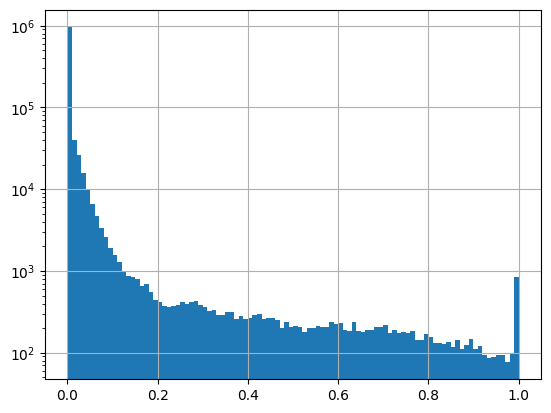

In [94]:
res['PRED'].hist(bins=100, log=True)

In [19]:
importance = model.feature_importances_

dict_imp={}

with open('fontossagok.txt', 'w') as file:
    for i, val in enumerate(importance):
        dict_imp[bemenő_változók[i]]=val
        print(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}")
        file.write(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}\n")

with open('fontossagok-tomb.txt', 'w') as file:
    for i, val in enumerate(importance):
        if (val>0):
            file.write(f"'{bemenő_változók[i]}',")

A(z) CONTRACT_CREDIT_LOSS_SUM oszlop fontossága: 0.1662505408485136
A(z) CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN oszlop fontossága: 0.01200042523451336
A(z) CONTRACT_INCOME_SUM oszlop fontossága: 0.008769637182736668
A(z) CONTRACT_INSTALMENT_AMOUNT_MEAN oszlop fontossága: 0.022220601804680058
A(z) CONTRACT_INTEREST_RATE_MEAN oszlop fontossága: 0.02492841590226197
A(z) CONTRACT_LGD_SUM oszlop fontossága: 0.037143509757593944
A(z) CONTRACT_LOAN_AMOUNT_SUM oszlop fontossága: 0.014611871370253587
A(z) CONTRACT_MORTGAGE_LENDING_VALUE_SUM oszlop fontossága: 0.02099764640431178
A(z) BORROWER_TYPE_OF_SETTLEMENT_3.0 oszlop fontossága: 0.001892277199392512
A(z) CONTRACT_BANK_ID_1d42bbf5 oszlop fontossága: 0.006068951262907853
A(z) CONTRACT_BANK_ID_2c6f5579 oszlop fontossága: 0.0035138274329706265
A(z) CONTRACT_BANK_ID_3b3b8a5e oszlop fontossága: 9.106483923726816e-05
A(z) CONTRACT_BANK_ID_41562c5f oszlop fontossága: 0.0
A(z) CONTRACT_BANK_ID_c8072c06 oszlop fontossága: 0.005528363191755618
A(z) CON

In [20]:
import operator
sorted_columns = sorted(dict_imp.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')

CONTRACT_LOAN_TYPE_5a06241e: 0.18363627138238006
CONTRACT_CREDIT_LOSS_SUM: 0.1662505408485136
CONTRACT_REFINANCED_10001.0: 0.1204184270371266
CONTRACT_CREDIT_INTERMEDIARY_20001.0: 0.10692580003965761
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0: 0.10356853647900591
CONTRACT_LOAN_TYPE_83910425: 0.05264178789009971
CONTRACT_LGD_SUM: 0.037143509757593944
CONTRACT_INTEREST_RATE_MEAN: 0.02492841590226197
CONTRACT_INSTALMENT_AMOUNT_MEAN: 0.022220601804680058
CONTRACT_BANK_ID_caa130b5: 0.021783758258127894
CONTRACT_MORTGAGE_LENDING_VALUE_SUM: 0.02099764640431178
CONTRACT_LOAN_TYPE_b503a0de: 0.014763636612425643
CONTRACT_LOAN_AMOUNT_SUM: 0.014611871370253587
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0: 0.013982945944217973
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0: 0.013062443806139057
CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN: 0.01200042523451336
CONTRACT_LOAN_TYPE_d3aaffde: 0.011968124054631896
CONTRACT_LOAN_CONTRACT_TYPE_1: 0.00936725249476666
CONTRACT_INCOME_SUM: 0.008769637182736668
CONTRACT_RE

In [21]:
# print(res.shape)
# res.to_csv('data/results2.csv', index=False)

In [22]:
len(bemenő_változók)

41

In [23]:
imp=[]
imp2=[]
for i in range(len(i1)):
    if(i1[i]>0):
        imp.append(i1[i])

for i in range(len(importance)):
    imp2.append(importance[i])

NameError: name 'i1' is not defined

In [ ]:
imp

In [ ]:
imp2

In [ ]:
for i in range(len(importance)):
    print(imp[i]-importance[i])

In [ ]:


column_importance = {
    'CONTRACT_CREDIT_LOSS_SUM': 0.16910412766343422,
    'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN': 0.0010854199994039476,
    'CONTRACT_INCOME_SUM': 0.00016402107884890086,
    'CONTRACT_INSTALMENT_AMOUNT_MEAN': 0.031180862589240545,
    'CONTRACT_INTEREST_RATE_MEAN': 0.030192901911618403,
    'CONTRACT_LGD_SUM': 0.0325214105387914,
    'CONTRACT_LOAN_AMOUNT_SUM': 0.059547996438097175,
    'CONTRACT_MORTGAGE_LENDING_VALUE_SUM': 0.0,
    'BORROWER_COUNTY_6.0': 0.0005365996241172926,
    'BORROWER_COUNTY_84.0': 6.109712470258696e-05,
    'BORROWER_COUNTY_114.0': 9.897689643537617e-05,
    'BORROWER_COUNTY_163.0': 0.00019303156699422723,
    'BORROWER_COUNTY_181.0': 0.00016810538899377636,
    'BORROWER_TYPE_OF_SETTLEMENT_3.0': 0.0004964242038491479,
    'CONTRACT_BANK_ID_1d42bbf5': 0.02072295988285964,
    'CONTRACT_BANK_ID_2c6f5579': 0.015205379415055013,
    'CONTRACT_BANK_ID_3b3b8a5e': 0.0025394648772917995,
    'CONTRACT_BANK_ID_41562c5f': 0.000331062561971647,
    'CONTRACT_BANK_ID_c8072c06': 0.01539687105066358,
    'CONTRACT_BANK_ID_caa130b5': 0.01534073692598546,
    'CONTRACT_BANK_ID_dfce4aec': 0.001707396711430799,
    'CONTRACT_CREDIT_INTERMEDIARY_1.0': 0.0006397696888633114,
    'CONTRACT_CREDIT_INTERMEDIARY_20001.0': 0.07940693730027754,
    'CONTRACT_CURRENCY_14': 0.0004959617374286843,
    'CONTRACT_FREQUENCY_TYPE_3265c5b7': 0.032039941764354374,
    'CONTRACT_FREQUENCY_TYPE_ad534644': 0.0019382207639447467,
    'CONTRACT_LOAN_CONTRACT_TYPE_1': 0.005183842232022988,
    'CONTRACT_LOAN_CONTRACT_TYPE_2': 0.002683927949735623,
    'CONTRACT_LOAN_CONTRACT_TYPE_11': 0.0013724299685780837,
    'CONTRACT_LOAN_TYPE_5a06241e': 0.2193531725654373,
    'CONTRACT_LOAN_TYPE_83910425': 0.07409743147205664,
    'CONTRACT_LOAN_TYPE_b503a0de': 0.0011494721200213294,
    'CONTRACT_LOAN_TYPE_d3aaffde': 0.03253124500133724,
    'CONTRACT_LOAN_TYPE_eab72d7a': 0.007576329008210865,
    'CONTRACT_REFINANCED_2.0': 0.0016514849246236352,
    'CONTRACT_REFINANCED_10001.0': 0.0360400486606488,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0': 0.021648224094653966,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0': 0.0007009618289603967,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0': 0.025900482687704014,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0': 0.052892616142717494,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0': 0.006102653638637873
}

# Rendezés a fontossági értékek alapján csökkenő sorrendben
sorted_columns = sorted(column_importance.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')